#Authors
**Author 1 (name and surname):** Sandra Burgos Artiguez

**Author 2 (name and surname):** Arántzazu López-Larraínzar Salazar

**Author 3 (name and surname):** Alan García Justel


# Preamble
Set the seed for experimental reproducibility:

In [ ]:
!pip install -U tfds-nightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 57.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from keras import datasets, layers, models, callbacks
from keras.saving import register_keras_serializable
from keras.callbacks import History
from keras.models import load_model


from typing import Literal, List
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

from tabulate import tabulate
import pickle
import os

# Set seed for experiment reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

#Exercise 1
**Step 1:** Mimicing the process seen in the lab tutorial, load the Oxford-IIIT Pets dataset and use 20% of the training data as your validation set. Do not forget to renumber the labels and normalize the images as in the tutorial.

**For faster training**, you can

1. use a buffer of 200 images, and try with more images only in your best configurations,
2. remove the visualization callback when calling `model.fit()`.

**Step 2:** Rewrite the `unet_model` method to accept more parameters so you can input:
* The activation function to use (`'relu'`, `'elu'`, etc.).
* The use or not of batch normalization (after each convolution).
* The use of dropout and its value (0 if not used).
* [optional] any other parameter you want to tune.

**Step 3:** Using different configurations of the U-Net architectures availble with `unet_model` and the different learning schedules learnt in the tutorial try to improve the test IoU obtained with the baseline architecture provided in the tutorial.

Use the following table to keep track of your experiments and the different hyperparameters you changed:

<table>
  <tr>
    <th>Exp. #</th>    
    <th>Model</th>
    <th>Epochs</th>
    <th>Residual</th>
    <th>Batch<br>size</br></th>
    <th>Learning<br>rate</br></th>
    <th>Learning<br>schedule</br></th>
    <th>Activation</th>
    <th>Dropout</th>
    <th>Batch<br>Normalization</br></th>
    <th>Early<br>Stopping</br></th>
    <th>Train<br>IoU</br></th>
    <th>Test<br>IoU</br></th>
    
  </tr>
  <tr>
    <td>0</td>
    <td>U_Net</td>
    <td>20</td>    
    <td>No</td>
    <td>64</td>
    <td>0.001</td>
    <td>Fixed lr</td>
    <td>ReLU</td>
    <td>No</td>
    <td>No</td>
    <td>No</td>
    <td>0.726254</td>
    <td>0.685162</td>
  </tr>
  <tr>
    <td>1</td>
    <td>U_Net</td>
    <td>20</td>
    <td>No</td>
    <td>64</td>
    <td>0.001</td>
    <td>Fixed lr</td>
    <td>ReLU</td>
    <td>No</td>
    <td>Yes</td>
    <td>No</td>
    <td>0.829222</td>
    <td>0.692184</td>
  </tr>
  <tr>
    <td>2</td>
    <td>U_Net</td>
    <td>20</td>
    <td>No</td>
    <td>64</td>
    <td>0.001</td>
    <td>Fixed lr</td>
    <td>ReLU</td>
    <td>0.01</td>
    <td>No</td>
    <td>Yes</td>
    <td>0.731746</td>
    <td>0.720949</td>
  </tr>
  <tr>
    <td>3</td>
    <td>U_Net</td>
    <td>20</td>
    <td>No</td>
    <td>64</td>
    <td>0.001</td>
    <td>Fixed lr</td>
    <td>ReLU</td>
    <td>0.1</td>
    <td>No</td>
    <td>Yes</td>
    <td>0.749206</td>
    <td>0.711459</td>
  </tr>
  <tr>
    <td>4</td>
    <td>U_Net</td>
    <td>20</td>
    <td>No</td>
    <td>64</td>
    <td>0.001</td>
    <td>Fixed lr</td>
    <td>ReLU</td>
    <td>0.01</td>
    <td>Yes</td>
    <td>Yes</td>
    <td>0.786648</td>
    <td>0.649133</td>
  </tr>
  <tr>
    <td>5</td>
    <td>U_Net</td>
    <td>20</td>
    <td>No</td>
    <td>64</td>
    <td>0.001</td>
    <td>Fixed lr</td>
    <td>CeLU</td>
    <td>No</td>
    <td>Yes</td>
    <td>No</td>
    <td>0.76492</td>
    <td>0.714583</td>
  </tr>
  <tr>
    <td>6</td>
    <td>U_Net</td>
    <td>20</td>
    <td>No</td>
    <td>64</td>
    <td>0.001</td>
    <td>Fixed lr</td>
    <td>eLU</td>
    <td>No</td>
    <td>Yes</td>
    <td>No</td>
    <td>0.785369</td>
    <td>0.723511</td>
  </tr>
  <tr>
    <td>7</td>
    <td>U_Net</td>
    <td>20</td>
    <td>No</td>
    <td>64</td>
    <td>0.001</td>
    <td>Fixed lr</td>
    <td>Sigmoid</td>
    <td>No</td>
    <td>Yes</td>
    <td>No</td>
    <td>0.750571</td>
    <td>0.520122</td>
  </tr>
  <tr>
    <td>8</td>
    <td>U_Net</td>
    <td>20</td>
    <td>No</td>
    <td>64</td>
    <td>0.001</td>
    <td>Fixed lr</td>
    <td>Tanh</td>
    <td>No</td>
    <td>Yes</td>
    <td>No</td>
    <td>0.746841</td>
    <td>0.680014</td>
  </tr>
  <tr>
    <td>9</td>
    <td>U_Net</td>
    <td>20</td>
    <td>No</td>
    <td>64</td>
    <td>0.001</td>
    <td>Linear lr (0.001 -> 0.0001)</td>
    <td>CeLU</td>
    <td>0.01</td>
    <td>Yes</td>
    <td>Yes</td>
    <td>0.778598</td>
    <td>0.737747</td>
  </tr>
  <tr>
    <td>10</td>
    <td>U_Net</td>
    <td>20</td>
    <td>No</td>
    <td>64</td>
    <td>0.001</td>
    <td>Exponential lr</td>
    <td>CeLU</td>
    <td>0.01</td>
    <td>Yes</td>
    <td>Yes</td>
    <td>0.781755</td>
    <td>0.739468</td>
  </tr>
  <tr>
    <td>11</td>
    <td>U_Net</td>
    <td>20</td>
    <td>No</td>
    <td>64</td>
    <td>0.005</td>
    <td>Plateau lr (0.005 -> 0.0001)</td>
    <td>CeLU</td>
    <td>0.01</td>
    <td>Yes</td>
    <td>Yes</td>
    <td>0.778229</td>
    <td>0.748202</td>
  </tr>
  <tr>
    <td>12</td>
    <td>U_Net</td>
    <td>20</td>
    <td>No</td>
    <td>64</td>
    <td>0.001</td>
    <td>One-cycle lr</td>
    <td>CeLU</td>
    <td>0.01</td>
    <td>Yes</td>
    <td>Yes</td>
    <td>0.772562</td>
    <td>0.712903</td>
  </tr>
  <tr>
    <td>13</td>
    <td>U_Net</td>
    <td>20</td>
    <td>No</td>
    <td>64</td>
    <td>0.005</td>
    <td>One-cycle lr</td>
    <td>CeLU</td>
    <td>0.01</td>
    <td>Yes</td>
    <td>Yes</td>
    <td>0.752886</td>
    <td>0.726535</td>
  </tr>
  <tr>
    <td>14</td>
    <td>Res_U_Net</td>
    <td>20</td>
    <td>Yes</td>
    <td>64</td>
    <td>0.001</td>
    <td>Fixed lr</td>
    <td>ReLU</td>
    <td>No</td>
    <td>No</td>
    <td>No</td>
    <td>0.827265</td>
    <td>0.667468</td>
  </tr>
  <tr>
    <td>15</td>
    <td>Res_U_Net</td>
    <td>20</td>
    <td>Yes</td>
    <td>64</td>
    <td>0.001</td>
    <td>One-cycle lr</td>
    <td>CeLU</td>
    <td>0.01</td>
    <td>Yes</td>
    <td>Yes</td>
    <td>0.807203</td>
    <td>0.702106</td>
  </tr>
</table>

Just as a reference, test IoU values between 0.79-0.80 are achievable with the techniques we saw in the tutorial.

**NOTE:** This table's columns only depict the most important hyperparameters and techniques we saw before. However, you can add any other column to show the effects of another technique or hyperparameter. Update the table as you consider.

Also remember to fix the seed to make the experiments reproducible (we will use a value of 42 for the seed).


## Dataset

Methods that:
- Normalize the values of the images to be between 0 and 1.
- Load the training dataset by flipping some of the images and normalizing all of them.
- Load the testing dataset and normalize them.
- Display the prediction results obtained.

In [ ]:
def normalize(input_image, input_mask):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask -= 1
  return input_image, input_mask

@tf.function
def load_image_train(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

  if tf.random.uniform(()) > 0.5:
    input_image = tf.image.flip_left_right(input_image)
    input_mask = tf.image.flip_left_right(input_mask)

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

def load_image_test(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

Load the Oxford-IIIT Pets dataset.

In [ ]:
dataset, info = tfds.load('oxford_iiit_pet:4.0.0', with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.DF6Z75_4.0.0/oxford_iiit_pet-train.tfrecord*...…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.DF6Z75_4.0.0/oxford_iiit_pet-test.tfrecord*...:…

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/4.0.0. Subsequent calls will reuse this data.


Hyperparameters:

In [ ]:
# Total number of training examples in the dataset
TRAIN_LENGTH = info.splits['train'].num_examples

# Training/validation partition
train_size = int(0.8 * TRAIN_LENGTH)
val_size = int(0.2 * TRAIN_LENGTH)

BATCH_SIZE = 64
BUFFER_SIZE = 200 # Try with larger values (500, 1000) if your training is fast
STEPS_PER_EPOCH = train_size // BATCH_SIZE

# number of epochs to wait without improvement in validation
EARLY_STOPPING_PATIENCE = 5

EPOCHS = 20
VAL_SUBSPLITS = 5
VALIDATION_STEPS = val_size//BATCH_SIZE//VAL_SUBSPLITS

Load the dataset into the training, validation and testing sets.

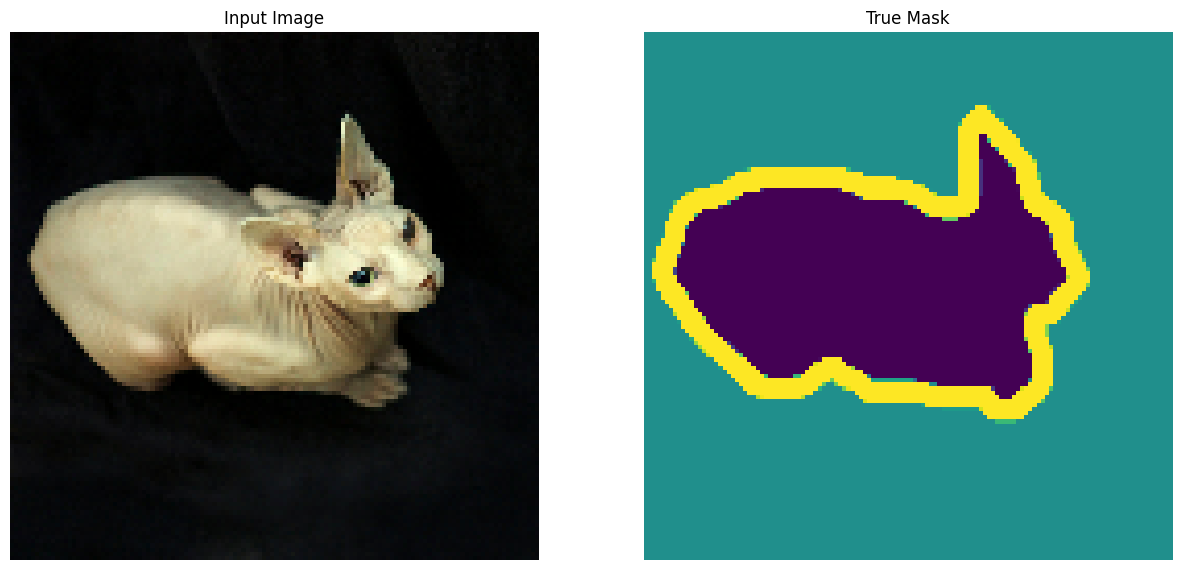

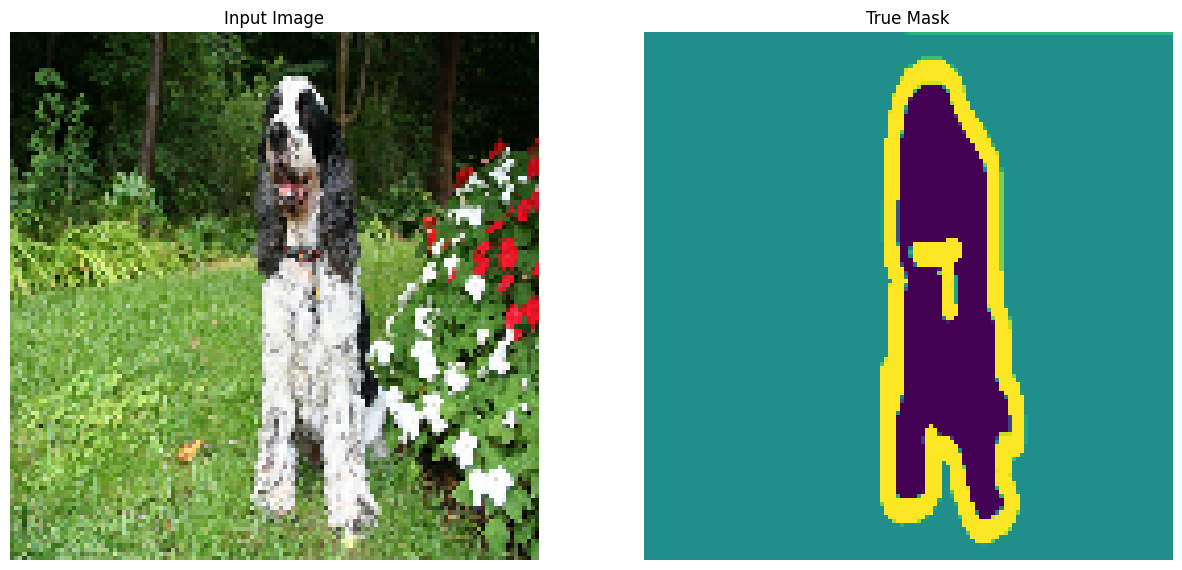

In [ ]:
dataset['train'].shuffle(BUFFER_SIZE)
train = dataset['train'].take( train_size ).map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
validation = dataset['train'].skip( train_size ).map(load_image_test)
test = dataset['test'].map(load_image_test)

train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

val_dataset = validation.batch(BATCH_SIZE)
test_dataset = test.batch(BATCH_SIZE)

for sample_image, sample_mask in train.take(2):
  display([sample_image, sample_mask])

## Evaluation Functions

In [ ]:
@register_keras_serializable()
def jaccard_index( y_true, y_pred ):
    ''' Define Jaccard index for multiple labels.
        Args:
            y_true (tensor): ground truth masks.
            y_pred (tensor): predicted masks.
        Return:
            jac (tensor): Jaccard index value
    '''
    # We read the number of classes from the last dimension of the true labels
    num_classes = tf.shape(y_true)[-1]
    # one_hot representation of predicted segmentation
    y_pred_ = tf.one_hot(tf.math.argmax(y_pred, axis=-1), num_classes, dtype=tf.int32, axis=-1)

    # one_hot representation of ground truth segmentation
    y_true_ = tf.cast( y_true, dtype=tf.uint8)
    y_true_ = tf.one_hot(tf.squeeze(y_true_, axis=-1), num_classes, dtype=tf.int32, axis=-1)

    TP = tf.math.count_nonzero(y_pred_ * y_true_)
    FP = tf.math.count_nonzero(y_pred_ * (y_true_ - 1))
    FN = tf.math.count_nonzero((y_pred_ - 1) * y_true_)

    jac = tf.cond(tf.greater((TP + FP + FN), 0), lambda: TP / (TP + FP + FN),
                  lambda: tf.cast(0.000, dtype='float64'))

    return jac

def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

def show_predictions(model, dataset=None, num=1):
  if dataset is not None:
    assert num > 0
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  elif sample_image is not None:
    assert sample_mask is not None
    display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

def show_model_history(model_history):
  loss = model_history.history['loss']
  val_loss = model_history.history['val_loss']

  iou = model_history.history['jaccard_index']
  val_iou = model_history.history['val_jaccard_index']

  plt.figure( figsize=(14,6) )

  # Plot loss per epoch
  plt.subplot(1, 2, 1)
  plt.plot(loss, 'r', label='Training loss')
  plt.plot(val_loss, 'bo', label='Validation loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss Value')
  plt.legend()

  # Plot Jaccard index per epoch
  plt.subplot(1, 2, 2)
  plt.plot(iou, 'r', label='Training IoU')
  plt.plot(val_iou, 'bo', label='Validation IoU')
  plt.title('Training and Validation IoU')
  plt.xlabel('Epoch')
  plt.ylabel('IoU Value')
  plt.legend()

  plt.show()

def get_color_palette(num_colors):
    """
    Args:
        num_colors (int): Number of colors to return

    Returns:
        list: List of hexadecimal colors.
    """
    # List of base colors
    base_colors = [
        '#FFB6C1',  # Light Pink
        '#87CEEB',  # Sky Blue
        '#98FB98',  # Pale Green
        '#FFD700',  # Gold
        '#FFA07A',  # Light Salmon
        '#DDA0DD',  # Plum
        '#87CEFA',  # Light Sky Blue
        '#FFE4B5',  # Moccasin
        '#AFEEEE',  # Pale Turquoise
        '#F08080',  # Light Coral
    ]
    if num_colors <= len(base_colors):
        return base_colors[:num_colors]

    # Gen random colors by interpolation
    palette = []
    for i in range(num_colors):
        color1 = mcolors.to_rgb(base_colors[i % len(base_colors)])
        color2 = mcolors.to_rgb(base_colors[(i + 1) % len(base_colors)])
        t = i / num_colors
        new_color = (
            color1[0] * (1 - t) + color2[0] * t,
            color1[1] * (1 - t) + color2[1] * t,
            color1[2] * (1 - t) + color2[2] * t,
        )
        palette.append(mcolors.to_hex(new_color)) # To Hex

    return palette


def evaluate_trained_models(trained_models, models_path:str=None):
  """
  RETURN: [(test_loss, test_acc, test_iou),...]
  """
  results = []
  for idx, (model, model_config, model_hist) in enumerate(trained_models):
     print(f"Evaluating {model_config.name} model...")

     if models_path is not None:
        e_path = os.path.join(models_path, f"{model_config.name}_eval.pkl")
        if os.path.exists(e_path):
          print(f"Loading evaluation ({e_path}) from path...")
          with open(e_path, "rb") as f:
            res = pickle.load(f)
          results.append(res)
          print()
          continue

     res = model.evaluate(test_dataset, verbose=1)
     results.append(res)

     if models_path is not None:
        with open(e_path, "wb") as f:
          pickle.dump(res, f)
     print()
  return results

def show_trained_models_info(trained_models, evaluations:list=None):
  """
  trained_models: [(model, model_config, model_hist), ...]
  evaluations (optional): [(test_loss, test_acc, test_iou),...]
  """
  table = []
  header = ["Model Name", "Training loss", "Training IoU", "Validation loss", "Validation IoU"]

  if evaluations is not None:
    assert len(evaluations) == len(trained_models)
    header = ["Model Name", "Training loss", "Training IoU", "Validation loss", "Validation IoU", "Test loss", "Test accuracy", "Test IoU"]

  for idx, (model, model_config, model_hist) in enumerate(trained_models):
    last_loss = model_hist.history['loss'][-1]
    last_iou = model_hist.history['jaccard_index'][-1]
    last_val_loss = model_hist.history['val_loss'][-1]
    last_val_iou = model_hist.history['val_jaccard_index'][-1]

    info = [model_config.name, last_loss, last_iou, last_val_loss, last_val_iou]
    if evaluations is not None:
      for e in evaluations[idx]:
        info.append(e)
    table.append(info)

  print(tabulate(table, headers=header))

def show_trained_models_hist(trained_models):
  """Show all the trained model hist.
  INPUT: [(model, model_config, model_hist)]
  """
  colors = get_color_palette(len(trained_models))
  fig, axes = plt.subplots(2,3, figsize=(24, 10))
  for idx, (model, model_config, model_hist) in enumerate(trained_models):
    color = colors[idx]
    loss      = model_hist.history['loss']
    val_loss  = model_hist.history['val_loss']
    iou       = model_hist.history['jaccard_index']
    val_iou   = model_hist.history['val_jaccard_index']

    axes[0, 0].set_title('Training Loss')
    axes[0, 0].plot(loss, color=color, label=model_config.name)
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss Value')

    axes[1, 0].set_title('Validation Loss')
    axes[1, 0].plot(val_loss, color=color, label=model_config.name)
    axes[1, 0].set_xlabel('Validation Step')
    axes[1, 0].set_ylabel('Loss Value')

    axes[0, 1].set_title('Training IoU')
    axes[0, 1].plot(iou, color=color, label=model_config.name)
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('IoU Value')

    axes[1, 1].set_title('Validation IoU')
    axes[1, 1].plot(val_iou, color=color, label=model_config.name)
    axes[1, 1].set_xlabel('Validation Step')
    axes[1, 1].set_ylabel('Loss Value')

    # For plotting all legends
    axes[0, 2].plot(0, 0, color=color, label=model_config.name)

  axes[1, 2].axis('off')
  axes[0, 2].axis('off')
  axes[0, 2].legend(loc='upper left')

## Unet model

In [ ]:
def unet_model(output_channels:int,
               activation_function:str = "relu",
               batch_norm:bool = False,
               drop_out_p:float = 0.0):

    inputs = keras.Input((128, 128, 3))

    af = activation_function

    # Extract activation function from convolution, apply batch norm if neccesary and
    # then, apply the activation function
    def conv_block(x, filters, kernel_size=(3, 3), padding='same'):
        x = layers.Conv2D(filters, kernel_size, padding=padding)(x)
        if batch_norm:
            x = layers.BatchNormalization()(x)
        x = layers.Activation(af)(x)
        return x

    c1 = conv_block(inputs, 16)
    c1 = conv_block(c1, 16)
    if drop_out_p > 0:
        c1 = layers.Dropout(drop_out_p)(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = conv_block(p1, 32)
    c2 = conv_block(c2, 32)
    if drop_out_p > 0:
        c2 = layers.Dropout(drop_out_p)(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = conv_block(p2, 64)
    c3 = conv_block(c3, 64)
    if drop_out_p > 0:
        c3 = layers.Dropout(drop_out_p)(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = conv_block(p3, 128)
    c4 = conv_block(c4, 128)
    if drop_out_p > 0:
        c4 = layers.Dropout(drop_out_p)(c4)

    # Expanding path (decoder)
    u5 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = layers.concatenate([u5, c3])
    c5 = conv_block(u5, 64)
    c5 = conv_block(c5, 64)

    u6 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c2])
    c6 = conv_block(u6, 32)
    c6 = conv_block(c6, 32)

    u7 = layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c1], axis=3)
    c7 = conv_block(u7, 16)
    c7 = conv_block(c7, 16)

    # The output will consist of "output_channels" neurons (one per class) with
    # softmax activation so they represent probabilities
    outputs = layers.Conv2D(output_channels, (1, 1), activation='softmax')(c7)

    return keras.Model(inputs=[inputs], outputs=[outputs])

## Defined Callbacks

In [ ]:
# callback for early stopping and saving best weights
earlystopper = callbacks.EarlyStopping(monitor='val_loss', patience=EARLY_STOPPING_PATIENCE, verbose=1, restore_best_weights=True)

class SchedulerPlotter:
    def __init__(self):
        self.lrs = []  # Lista para almacenar los valores de learning rate
        self.moms = []  # Lista para almacenar los valores de momentum

    def get_lr(self):
        """Obtiene el learning rate actual del optimizador."""
        try:
            return tf.keras.backend.get_value(self.model.optimizer.lr)
        except AttributeError:
            return None

    def get_momentum(self):
        """Obtiene el momentum actual del optimizador."""
        try:
            return tf.keras.backend.get_value(self.model.optimizer.momentum)
        except AttributeError:
            return None

    def plot(self, axes=None):
        """Grafica el learning rate y momentum."""
        if axes is None:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        else:
            assert len(axes) == 2
            ax1, ax2 = axes
        ax1.plot(self.lrs)
        ax1.set_title('Learning Rate')
        ax2.plot(self.moms)
        ax2.set_title('Momentum')

# Linear Learning Rate Scheduler
class LinearLearningRateScheduler(callbacks.Callback, SchedulerPlotter):
    def __init__(self, initial_learning_rate, final_learning_rate, total_epochs):
        # Llama a los constructores de ambas clases base
        callbacks.Callback.__init__(self)
        SchedulerPlotter.__init__(self)
        self.initial_learning_rate = initial_learning_rate
        self.final_learning_rate = final_learning_rate
        self.total_epochs = total_epochs
        self.learning_rate_step = (final_learning_rate - initial_learning_rate) / total_epochs
    def set_lr(self, lr):
        try:
            tf.keras.backend.set_value(self.model.optimizer.lr, lr)
        except AttributeError:
            pass # ignore

    def on_epoch_begin(self, epoch, logs=None):
        """Actualiza el learning rate al comienzo de cada época."""
        new_learning_rate = self.initial_learning_rate + self.learning_rate_step * epoch
        self.set_lr(new_learning_rate)
        print(f"Epoch {epoch + 1}: Learning rate is {new_learning_rate}")

    def on_train_batch_begin(self, batch, logs=None):
        """Almacena el learning rate y momentum al comienzo de cada batch."""
        self.lrs.append(self.get_lr())
        self.moms.append(self.get_momentum())

def get_linear_lr_scheduler(total_epochs:int, initial_learning_rate:float=0.01, final_learning_rate:float=0.001) -> callbacks.Callback:
  return LinearLearningRateScheduler(initial_learning_rate, final_learning_rate, total_epochs)

# Exponential Learning Rate Scheduler
class ExponentialLearningRateScheduler(callbacks.Callback, SchedulerPlotter):
    def __init__(self, initial_learning_rate, decay_rate=0.1, warmup_epochs=3):
        super(ExponentialLearningRateScheduler, self).__init__()
        self.initial_learning_rate = initial_learning_rate
        self.decay_rate = decay_rate
        self.warmup_epochs = warmup_epochs
        self.lrs = []
        self.moms = []
    def set_lr(self, lr):
        try:
            tf.keras.backend.set_value(self.model.optimizer.lr, lr)
        except AttributeError:
            pass # ignore
    def on_epoch_begin(self, epoch, logs=None):
        if epoch < self.warmup_epochs:
            new_learning_rate = self.initial_learning_rate
        else:
            new_learning_rate = self.initial_learning_rate * tf.math.exp(-self.decay_rate * (epoch - self.warmup_epochs)).numpy()
        self.set_lr(new_learning_rate)
    def on_train_batch_begin(self, batch, logs=None):
        self.lrs.append(self.get_lr())
        self.moms.append(self.get_momentum())

def get_exponential_lr_scheduler(initial_learning_rate:float=0.01, decay_rate:float=0.1, warmup_epochs:int=3) -> callbacks.Callback:
  return ExponentialLearningRateScheduler(initial_learning_rate, decay_rate, warmup_epochs)

# Plateau Learning Rate Scheduler
class CustomReduceLROnPlateau(callbacks.ReduceLROnPlateau, SchedulerPlotter):
    def __init__(self, monitor:str='val_loss', factor:float=0.2, patience:int=3, min_lr:float=0.0001) -> None:
        super().__init__(monitor='val_loss',factor=factor, patience=patience, min_lr=min_lr)
    def on_train_batch_begin(self, batch, logs=None):
        self.lrs.append(self.get_lr())
        self.moms.append(self.get_momentum())

def get_plateau_lr_scheduler(factor:float=0.2, patience:int=3, min_lr:float=0.0001) -> callbacks.Callback:
  return callbacks.ReduceLROnPlateau(factor=factor, patience=patience, min_lr=min_lr)


# One Cycle Learning Rate Scheduler
class CosineAnnealer:
    def __init__(self, start, end, steps):
        self.start = start
        self.end = end
        self.steps = steps
        self.n = 0
    def step(self):
        self.n += 1
        cos = np.cos(np.pi * (self.n / self.steps)) + 1
        return self.end + (self.start - self.end) / 2. * cos
class OneCycleScheduler(callbacks.Callback):
    """ `Callback` that schedules the learning rate on a 1cycle policy as per Leslie Smith's paper(https://arxiv.org/pdf/1803.09820.pdf).
    If the model supports a momentum parameter, it will also be adapted by the schedule.
    The implementation adopts additional improvements as per the fastai library: https://docs.fast.ai/callbacks.one_cycle.html, where
    only two phases are used and the adaptation is done using cosine annealing.
    In phase 1 the LR increases from `lr_max / div_factor` to `lr_max` and momentum decreases from `mom_max` to `mom_min`.
    In the second phase the LR decreases from `lr_max` to `lr_max / (div_factor * 1e4)` and momemtum from `mom_max` to `mom_min`.
    By default the phases are not of equal length, with the phase 1 percentage controlled by the parameter `phase_1_pct`.
    """
    def __init__(self, lr_max, steps, mom_min=0.85, mom_max=0.95, phase_1_pct=0.3, div_factor=25.):
        super(OneCycleScheduler, self).__init__()
        lr_min = lr_max / div_factor
        final_lr = lr_max / (div_factor * 1e4)
        phase_1_steps = steps * phase_1_pct
        phase_2_steps = steps - phase_1_steps

        self.phase_1_steps = phase_1_steps
        self.phase_2_steps = phase_2_steps
        self.phase = 0
        self.step = 0

        self.phases = [[CosineAnnealer(lr_min, lr_max, phase_1_steps), CosineAnnealer(mom_max, mom_min, phase_1_steps)],
                 [CosineAnnealer(lr_max, final_lr, phase_2_steps), CosineAnnealer(mom_min, mom_max, phase_2_steps)]]

        self.lrs = []
        self.moms = []

    def on_train_begin(self, logs=None):
        self.phase = 0
        self.step = 0
        self.set_lr(self.lr_schedule().start)
        self.set_momentum(self.mom_schedule().start)
    def on_train_batch_begin(self, batch, logs=None):
        self.lrs.append(self.get_lr())
        self.moms.append(self.get_momentum())
    def on_train_batch_end(self, batch, logs=None):
        self.step += 1
        if self.step >= self.phase_1_steps:
            self.phase = 1
        self.set_lr(self.lr_schedule().step())
        self.set_momentum(self.mom_schedule().step())
    def get_lr(self):
        try:
            return tf.keras.backend.get_value(self.model.optimizer.lr)
        except AttributeError:
            return None
    def get_momentum(self):
        try:
            return tf.keras.backend.get_value(self.model.optimizer.momentum)
        except AttributeError:
            return None
    def set_lr(self, lr):
        try:
            tf.keras.backend.set_value(self.model.optimizer.lr, lr)
        except AttributeError:
            pass # ignore
    def set_momentum(self, mom):
        try:
            tf.keras.backend.set_value(self.model.optimizer.momentum, mom)
        except AttributeError:
            pass # ignore
    def lr_schedule(self):
        return self.phases[self.phase][0]
    def mom_schedule(self):
        return self.phases[self.phase][1]
    def plot(self):
        ax = plt.subplot(1, 2, 1)
        ax.plot(self.lrs)
        ax.set_title('Learning Rate')
        ax = plt.subplot(1, 2, 2)
        ax.plot(self.moms)
        ax.set_title('Momentum')
def get_onecycle_lr_scheduler(epochs:int, lr_max:float=0.005, train_size:int=train_size, batch_size:int=BATCH_SIZE) -> callbacks.Callback:
  steps = np.ceil( train_size / batch_size) * EPOCHS
  return OneCycleScheduler(lr_max, steps=steps)

## Experiments

In [ ]:
VALID_ACTIVATION_FUNCTIONS = Literal[ "celu", "elu", "exponential", "gelu", "glu", "hard_shrink", "hard_sigmoid", "hard_silu", "hard_tanh", "leaky_relu", "linear", "log_sigmoid", "log_softmax", "mish", "relu", "relu6", "selu", "sigmoid", "silu", "softmax", "soft_shrink", "softplus", "softsign", "sparse_plus", "sparsemax", "squareplus", "tanh", "tanh_shrink", "threshold"]

class ModelConfiguration:
    def __init__(self, **kwargs):
        self.name: str                                        = kwargs.get("name", "")
        self.epochs: int                                      = kwargs.get("epochs", EPOCHS)
        self.output_channels: int                             = kwargs.get("output_channels", 3)
        self.initial_lr: float                                = kwargs.get("initial_lr", 0.001)
        self.activation_function: VALID_ACTIVATION_FUNCTIONS  = kwargs.get("activation_function", "relu")
        self.batch_norm: bool                                 = kwargs.get("batch_norm", False)
        self.drop_out_p: float                                = kwargs.get("drop_out_p", 0.0)
        self.early_stopping_func: callbacks.Callback | None   = kwargs.get("early_stopping_func", None)
        self.lr_scheduler_func: callbacks.Callback | None     = kwargs.get("lr_scheduler_func", None)
        self.training_callbacks: List[callbacks.Callback]     = []

        # Añadir callbacks si están definidos
        if self.early_stopping_func is not None:
            self.training_callbacks.append(self.early_stopping_func)
        if self.lr_scheduler_func is not None:
            self.training_callbacks.append(self.lr_scheduler_func)

def train_unet_models_with_config(model_configs:List[ModelConfiguration], models_path=None) -> List[History]:
  models = []
  for mc in model_configs:
    print("===============================================================================")
    m_path      = None
    m_hist_path = None

    if models_path is not None:
      print(f"Checking if '{mc.name}' model is in {models_path}")
      m_path      = os.path.join(models_path, f"{mc.name}.keras")
      m_hist_path = os.path.join(models_path, f"{mc.name}_hist.pkl")
      if os.path.exists(m_path) and os.path.exists(m_hist_path):
        print(f"Loading model ({m_path}) and model_hist ({m_hist_path}) from path...")
        model = load_model(m_path)
        with open(m_hist_path, "rb") as f:
          model_hist = pickle.load(f)
        models.append((model, mc, model_hist))
        print(f"Model '{mc.name}' loaded :D !!!")
        print()
        continue

    print(f"Compiling and Training '{mc.name}' model...")

    # Define the optimizer as Adam
    opt = keras.optimizers.Adam(learning_rate=mc.initial_lr)

    # Build the model from configuration
    model = unet_model(output_channels=mc.output_channels,
                      activation_function=mc.activation_function,
                      batch_norm=mc.batch_norm,
                      drop_out_p=mc.drop_out_p)
    model.compile(optimizer=opt,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy', jaccard_index]
                  )

    # Train the model
    print(mc.training_callbacks)
    model_hist = model.fit(
        train_dataset,
        epochs=mc.epochs,
        steps_per_epoch=STEPS_PER_EPOCH,
        validation_steps=VALIDATION_STEPS,
        validation_data=val_dataset,
        callbacks=mc.training_callbacks)

    if models_path is not None:
      model.save(m_path)
      with open(m_hist_path, "wb") as f:
        pickle.dump(model_hist, f)
    models.append((model, mc, model_hist))
    print(f"Model '{mc.name}' trained :D !!!")
    print()
  return models


In [ ]:
# act_funcs = ["relu", "celu", "elu", "sigmoid", "tanh"]
# lr_schedulers = ["linear", "exponential", "plateau", "onecycle"]

# Model Configurations
all_model_configs = []

# Baseline Model Configuration
baseline_model_config = ModelConfiguration(
    name="unet_baseline",
    initial_lr=0.001,
    activation_function="relu",
    batch_norm=False,
    drop_out_p=0.0,
    early_stopping_func=None,
    lr_scheduler_func = None
)
all_model_configs.append(baseline_model_config)

##### BATCH NORM?? #####
# Adding Batch Normatilation to baseline
bs_batchNorm_model_config = ModelConfiguration(
    name="unet_baseline_with_batchNorm",
    initial_lr=0.001,
    activation_function="relu",
    batch_norm=True,
    drop_out_p=0.0,
    early_stopping_func=None,
    lr_scheduler_func = None
)
all_model_configs.append(bs_batchNorm_model_config)



##### PLAYING WITH DROPOUT #####
# Adding Dropout to baseline (also with early stopping)
bs_droput0_01_model_config = ModelConfiguration(
    name="unet_baseline_with_dropout_0-01",
    initial_lr=0.001,
    activation_function="relu",
    batch_norm=False,
    drop_out_p=0.01,
    early_stopping_func=earlystopper,
    lr_scheduler_func = None
)
all_model_configs.append(bs_droput0_01_model_config)

# More agressive dropout
bs_droput0_1_model_config = ModelConfiguration(
    name="unet_baseline_with_dropout_0-1",
    initial_lr=0.001,
    activation_function="relu",
    batch_norm=False,
    drop_out_p=0.1,
    early_stopping_func=earlystopper,
    lr_scheduler_func = None
)
all_model_configs.append(bs_droput0_1_model_config)
# It seems like dropout=0.001 gives the best results

bs_batchNorm_droput0_01_model_config = ModelConfiguration(
    name="unet_baseline_with_batchNorm_and_dropout_0-01",
    initial_lr=0.001,
    activation_function="relu",
    batch_norm=True,
    drop_out_p=0.01,
    early_stopping_func=earlystopper,
    lr_scheduler_func = None
)
all_model_configs.append(bs_batchNorm_droput0_01_model_config)


##### CHANGIN ACTIVATION FUNCTIONS #####
# Baseline with celu instead of relu
bs_celu_model_config = ModelConfiguration(
    name="unet_baseline_with_celu",
    initial_lr=0.001,
    activation_function="celu",
    batch_norm=True,
    drop_out_p=0.0,
    early_stopping_func=None,
    lr_scheduler_func = None
)
all_model_configs.append(bs_celu_model_config)

# Baseline with elu instead of relu
bs_elu_model_config = ModelConfiguration(
    name="unet_baseline_with_elu",
    initial_lr=0.001,
    activation_function="elu",
    batch_norm=True,
    drop_out_p=0.0,
    early_stopping_func=None,
    lr_scheduler_func = None
)
all_model_configs.append(bs_elu_model_config)

# Baseline with sigmoid instead of relu
bs_sigmoid_model_config = ModelConfiguration(
    name="unet_baseline_with_sigmoid",
    initial_lr=0.001,
    activation_function="sigmoid",
    batch_norm=True,
    drop_out_p=0.0,
    early_stopping_func=None,
    lr_scheduler_func = None
)
all_model_configs.append(bs_sigmoid_model_config)

# Baseline with tanh instead of relu
bs_tanh_model_config = ModelConfiguration(
    name="unet_baseline_with_tanh",
    initial_lr=0.001,
    activation_function="tanh",
    batch_norm=True,
    drop_out_p=0.0,
    early_stopping_func=None,
    lr_scheduler_func = None
)
all_model_configs.append(bs_tanh_model_config)



##### PLAYING WITH LEARNING RATE SCHEDULERS #####
# From the bes model configs...
linear_sch_model_config = ModelConfiguration(
    name="unet_linear_sch",
    initial_lr=0.001,
    activation_function="celu",
    batch_norm=True,
    drop_out_p=0.01,
    early_stopping_func=earlystopper,
    lr_scheduler_func = get_linear_lr_scheduler(EPOCHS, initial_learning_rate=0.001, final_learning_rate=0.0001)
)
all_model_configs.append(linear_sch_model_config)

exponential_sch_model_config = ModelConfiguration(
    name="unet_exponential_sch",
    initial_lr=0.001,
    activation_function="celu",
    batch_norm=True,
    drop_out_p=0.01,
    early_stopping_func=earlystopper,
    lr_scheduler_func = get_exponential_lr_scheduler(initial_learning_rate=0.001)
)
all_model_configs.append(exponential_sch_model_config)

plateau_sch_model_config = ModelConfiguration(
    name="unet_plateau_sch",
    initial_lr=0.005,
    activation_function="celu",
    batch_norm=True,
    drop_out_p=0.01,
    early_stopping_func=earlystopper,
    lr_scheduler_func = get_plateau_lr_scheduler(min_lr=0.0001)
)
all_model_configs.append(plateau_sch_model_config)

onecycle_sch_model_config = ModelConfiguration(
    name="unet_onecycle_sch",
    initial_lr=0.001,
    activation_function="celu",
    batch_norm=True,
    drop_out_p=0.01,
    early_stopping_func=earlystopper,
    lr_scheduler_func = get_onecycle_lr_scheduler(EPOCHS)
)
all_model_configs.append(onecycle_sch_model_config)

onecycle_sch_0_005_model_config = ModelConfiguration(
    name="unet_onecycle_sch_0-005",
    initial_lr=0.005,
    activation_function="celu",
    batch_norm=True,
    drop_out_p=0.01,
    early_stopping_func=earlystopper,
    lr_scheduler_func = get_onecycle_lr_scheduler(EPOCHS)
)
all_model_configs.append(onecycle_sch_0_005_model_config)

In [ ]:
# Train all defined models
trained_models = train_unet_models_with_config(all_model_configs, models_path="./trained_models")

Checking if 'unet_baseline' model is in ./trained_models
Loading model (./trained_models/unet_baseline.keras) and model_hist (./trained_models/unet_baseline_hist.pkl) from path...
Model 'unet_baseline' loaded :D !!!

Checking if 'unet_baseline_with_batchNorm' model is in ./trained_models
Loading model (./trained_models/unet_baseline_with_batchNorm.keras) and model_hist (./trained_models/unet_baseline_with_batchNorm_hist.pkl) from path...
Model 'unet_baseline_with_batchNorm' loaded :D !!!

Checking if 'unet_baseline_with_dropout_0-01' model is in ./trained_models
Loading model (./trained_models/unet_baseline_with_dropout_0-01.keras) and model_hist (./trained_models/unet_baseline_with_dropout_0-01_hist.pkl) from path...
Model 'unet_baseline_with_dropout_0-01' loaded :D !!!

Checking if 'unet_baseline_with_dropout_0-1' model is in ./trained_models
Loading model (./trained_models/unet_baseline_with_dropout_0-1.keras) and model_hist (./trained_models/unet_baseline_with_dropout_0-1_hist.pkl)

In [ ]:
evaluations = evaluate_trained_models(trained_models, models_path="./trained_models")

Evaluating unet_baseline model...
Loading evaluation (./trained_models/unet_baseline_eval.pkl) from path...

Evaluating unet_baseline_with_batchNorm model...
Loading evaluation (./trained_models/unet_baseline_with_batchNorm_eval.pkl) from path...

Evaluating unet_baseline_with_dropout_0-01 model...
Loading evaluation (./trained_models/unet_baseline_with_dropout_0-01_eval.pkl) from path...

Evaluating unet_baseline_with_dropout_0-1 model...
Loading evaluation (./trained_models/unet_baseline_with_dropout_0-1_eval.pkl) from path...

Evaluating unet_baseline_with_batchNorm_and_dropout_0-01 model...
Loading evaluation (./trained_models/unet_baseline_with_batchNorm_and_dropout_0-01_eval.pkl) from path...

Evaluating unet_baseline_with_celu model...
Loading evaluation (./trained_models/unet_baseline_with_celu_eval.pkl) from path...

Evaluating unet_baseline_with_elu model...
Loading evaluation (./trained_models/unet_baseline_with_elu_eval.pkl) from path...

Evaluating unet_baseline_with_sigmo

In [ ]:
show_trained_models_info(trained_models, evaluations)

Model Name                                       Training loss    Training IoU    Validation loss    Validation IoU    Test loss    Test accuracy    Test IoU
---------------------------------------------  ---------------  --------------  -----------------  ----------------  -----------  ---------------  ----------
unet_baseline                                         0.372534        0.723259           0.388529          0.707389     0.398312         0.837106    0.706917
unet_baseline_with_batchNorm                          0.234498        0.840024           0.381013          0.728473     0.397645         0.84455     0.723097
unet_baseline_with_dropout_0-01                       0.374598        0.724631           0.380833          0.715143     0.39309          0.83917     0.715593
unet_baseline_with_dropout_0-1                        0.358672        0.737415           0.3905            0.70807      0.40119          0.839234    0.713257
unet_baseline_with_batchNorm_and_dropout_0-01       

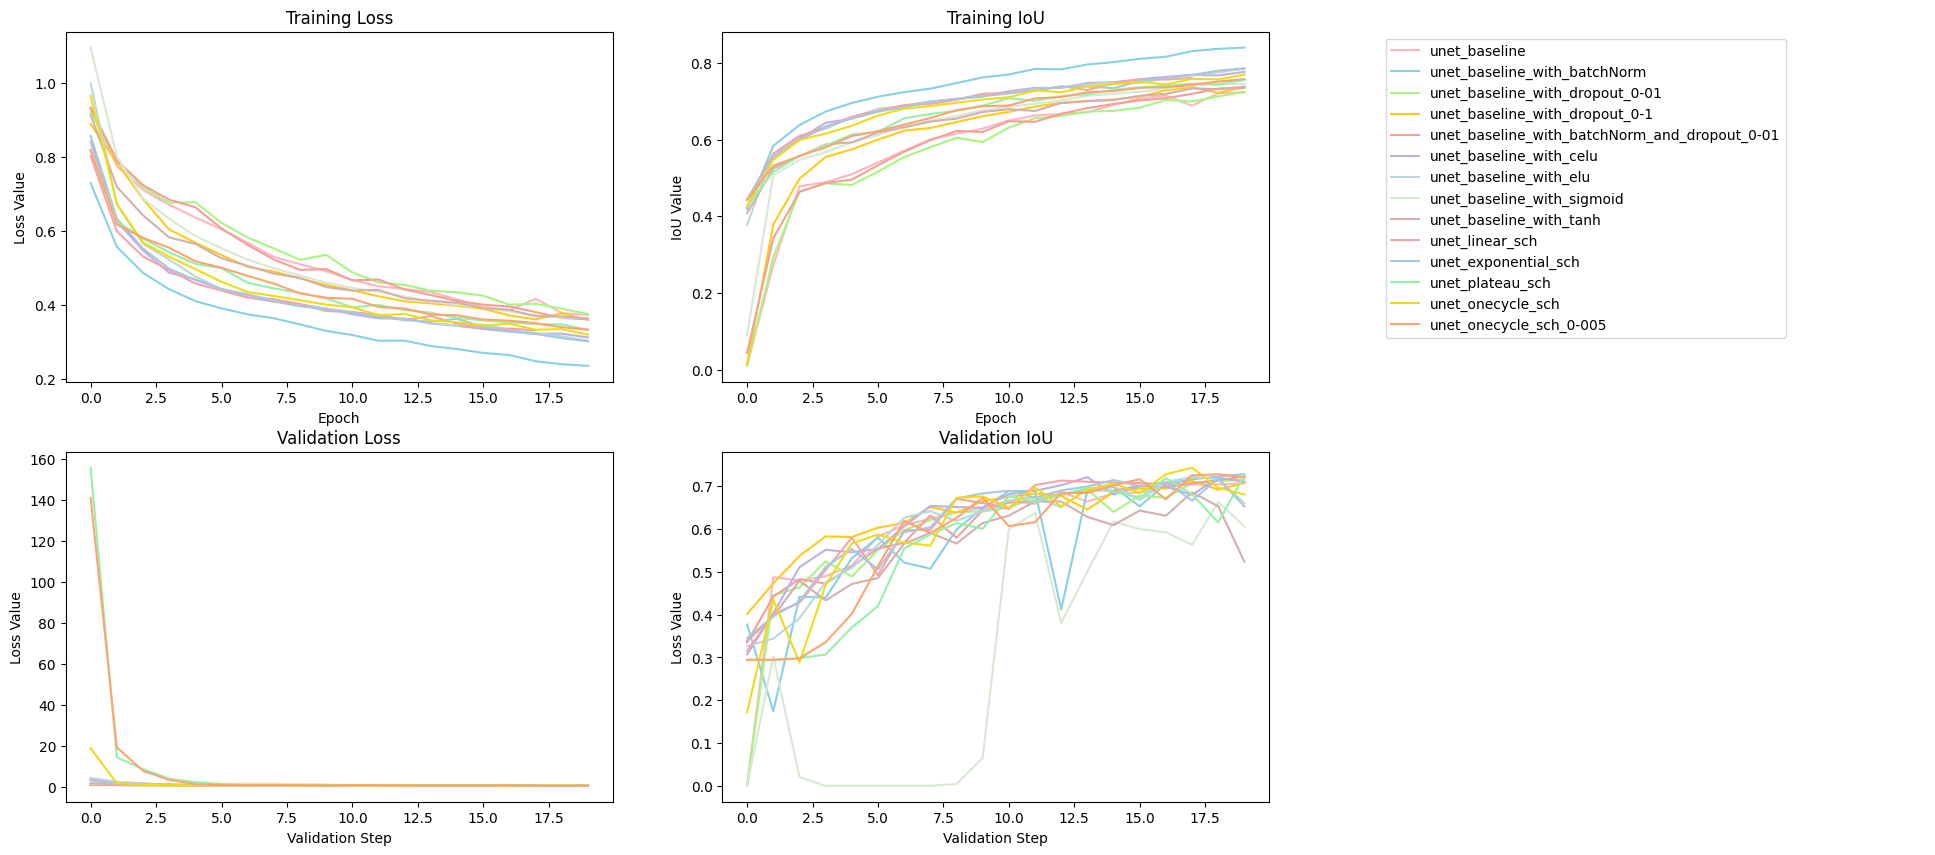

In [ ]:
show_trained_models_hist(trained_models)

#Exercise 2
**Step 1:** Create a `res_unet_model` method with a similar implementation to our previous `unet_model` method but using **residual blocks** in each level of the U-Net.

Basically, what you have to do is to replace the basic two-convolution block from our original U-Net-like architecture:

<figure>
<center>
<img src="https://drive.google.com/uc?id=1nzZiKJz7FsRv1qi-VedzKo9w4ZsQppOq" width="450">
</figure>

With a residual block that looks like this:

<figure>
<center>
<img src="https://drive.google.com/uc?id=1lEqaZOGXHJYdIuPSBjvp79l4eSnSQdaU" width="450">
</figure>

Notice that, in order to add the residual (the original input to the convolutional block) to the output of the convolutional block, we need to perform a 1x1 convolution so the number of channels match.

**This residual blocks are to be included in both sides of the architecture, the encoding and the decoding paths.**

**Step 2:** Create a new entry in the experiments table called "Residual" to specify the use of our residual U-Net and see if you can improve the results of the previous exercise.


In [ ]:
def res_unet_model(output_channels:int,
               activation_function:str = "relu",
               batch_norm:bool = False,
               drop_out_p:float = 0.0):

    inputs = keras.Input((128, 128, 3))

    af = activation_function

    # Extract activation function from convolution, apply batch norm if neccesary and
    # then, apply the activation function
    def conv_block(x, filters, kernel_size=(3, 3), padding='same', batch_norm=True, af='relu'):
      x = layers.Conv2D(filters, kernel_size, padding=padding)(x)
      if batch_norm:
          x = layers.BatchNormalization()(x)
      x = layers.Activation(af)(x)
      return x

    # Block 1
    residual = inputs
    c1 = conv_block(inputs, 16)
    c1 = conv_block(c1, 16)
    if drop_out_p > 0:
        c1 = layers.Dropout(drop_out_p)(c1)
    if residual.shape[-1] != 16:
        # Adjust dimensions with 1x1 convolution
        residual = layers.Conv2D(16, (1, 1), padding='same')(residual)
    c1 = layers.Add()([c1, residual])
    p1 = layers.MaxPooling2D((2, 2))(c1)

    # Block 2
    residual = p1
    c2 = conv_block(p1, 32)
    c2 = conv_block(c2, 32)
    if drop_out_p > 0:
        c2 = layers.Dropout(drop_out_p)(c2)
    if residual.shape[-1] != 32:
        # Adjust dimensions with 1x1 convolution
        residual = layers.Conv2D(32, (1, 1), padding='same')(residual)
    c2 = layers.Add()([c2, residual])
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Block 3
    residual = p2
    c3 = conv_block(p2, 64)
    c3 = conv_block(c3, 64)
    if drop_out_p > 0:
        c3 = layers.Dropout(drop_out_p)(c3)
    if residual.shape[-1] != 64:
        # Adjust dimensions with 1x1 convolution
        residual = layers.Conv2D(64, (1, 1), padding='same')(residual)
    c3 = layers.Add()([c3, residual])
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck
    residual = p3
    c4 = conv_block(p3, 128)
    c4 = conv_block(c4, 128)
    if drop_out_p > 0:
        c4 = layers.Dropout(drop_out_p)(c4)
    if residual.shape[-1] != 128:
        # Adjust dimensions with 1x1 convolution
        residual = layers.Conv2D(128, (1, 1), padding='same')(residual)
    c4 = layers.Add()([c4, residual])


    # Expanding path (decoder)
    u5 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = layers.concatenate([u5, c3])
    residual = u5
    c5 = conv_block(u5, 64)
    c5 = conv_block(c5, 64)
    if residual.shape[-1] != 64:
        # Adjust dimensions with 1x1 convolution
        residual = layers.Conv2D(64, (1, 1), padding='same')(residual)
    c5 = layers.Add()([c5, residual])


    u6 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c2])
    residual = u6
    c6 = conv_block(u6, 32)
    c6 = conv_block(c6, 32)
    if residual.shape[-1] != 32:
        # Adjust dimensions with 1x1 convolution
        residual = layers.Conv2D(32, (1, 1), padding='same')(residual)
    c6 = layers.Add()([c6, residual])

    u7 = layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c1], axis=3)
    residual = u7
    c7 = conv_block(u7, 16)
    c7 = conv_block(c7, 16)
    if residual.shape[-1] != 16:
        # Adjust dimensions with 1x1 convolution
        residual = layers.Conv2D(16, (1, 1), padding='same')(residual)
    c7 = layers.Add()([c7, residual])

    # The output will consist of "output_channels" neurons (one per class) with
    # softmax activation so they represent probabilities
    outputs = layers.Conv2D(output_channels, (1, 1), activation='softmax')(c7)

    return keras.Model(inputs=[inputs], outputs=[outputs])

## Experiments

In [ ]:
def train_res_unet_models_with_config(model_configs:List[ModelConfiguration], models_path=None) -> List[History]:
  models = []
  for mc in model_configs:
    print("===============================================================================")
    m_path      = None
    m_hist_path = None

    if models_path is not None:
      print(f"Checking if '{mc.name}' model is in {models_path}")
      m_path      = os.path.join(models_path, f"{mc.name}.keras")
      m_hist_path = os.path.join(models_path, f"{mc.name}_hist.pkl")
      if os.path.exists(m_path) and os.path.exists(m_hist_path):
        print(f"Loading model ({m_path}) and model_hist ({m_hist_path}) from path...")
        model = load_model(m_path)
        with open(m_hist_path, "rb") as f:
          model_hist = pickle.load(f)
        models.append((model, mc, model_hist))
        print(f"Model '{mc.name}' loaded :D !!!")
        print()
        continue

    print(f"Compiling and Training '{mc.name}' model...")

    # Define the optimizer as Adam
    opt = keras.optimizers.Adam(learning_rate=mc.initial_lr)

    # Build the model from configuration
    model = res_unet_model(output_channels=mc.output_channels,
                      activation_function=mc.activation_function,
                      batch_norm=mc.batch_norm,
                      drop_out_p=mc.drop_out_p)
    model.compile(optimizer=opt,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy', jaccard_index]
                  )

    # Train the model
    model_hist = model.fit(
        train_dataset,
        epochs=mc.epochs,
        steps_per_epoch=STEPS_PER_EPOCH,
        validation_steps=VALIDATION_STEPS,
        validation_data=val_dataset,
        callbacks=mc.training_callbacks)

    if models_path is not None:
      model.save(m_path)
      with open(m_hist_path, "wb") as f:
        pickle.dump(model_hist, f)
    models.append((model, mc, model_hist))
    print(f"Model '{mc.name}' trained :D !!!")
    print()
  return models

In [ ]:
# Model Configurations
all_res_model_configs = []

# Baseline Model Configuration
baseline_model_config = ModelConfiguration(
    name="res_unet_baseline",
    initial_lr=0.001,
    activation_function="relu",
    batch_norm=False,
    drop_out_p=0.0,
    early_stopping_func=None,
    lr_scheduler_func = None
)
all_res_model_configs.append(baseline_model_config)

# Best Configuration of the U-net model
onecycle_sch_model_config = ModelConfiguration(
    name="res_unet_onecycle_sch",
    initial_lr=0.001,
    activation_function="celu",
    batch_norm=True,
    drop_out_p=0.01,
    early_stopping_func=earlystopper,
    lr_scheduler_func = get_onecycle_lr_scheduler(EPOCHS)
)
all_res_model_configs.append(onecycle_sch_model_config)

In [ ]:
# Train all defined models
res_trained_models = train_res_unet_models_with_config(all_res_model_configs, models_path="./trained_models")

Checking if 'res_unet_baseline' model is in ./trained_models
Compiling and Training 'res_unet_baseline' model...
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_99']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


46/46 ━━━━━━━━━━━━━━━━━━━━ 36s 326ms/step - accuracy: 0.5931 - jaccard_index: 0.2834 - loss: 0.8931 - val_accuracy: 0.6267 - val_jaccard_index: 0.1710 - val_loss: 0.7962
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 411ms/step - accuracy: 0.7493 - jaccard_index: 0.5405 - loss: 0.5964 - val_accuracy: 0.6217 - val_jaccard_index: 0.1289 - val_loss: 0.8788
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 261ms/step - accuracy: 0.7837 - jaccard_index: 0.6081 - loss: 0.5169 - val_accuracy: 0.6961 - val_jaccard_index: 0.4265 - val_loss: 0.7023
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 473ms/step - accuracy: 0.8032 - jaccard_index: 0.6433 - loss: 0.4740 - val_accuracy: 0.7236 - val_jaccard_index: 0.4653 - val_loss: 0.6674
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 273ms/step - accuracy: 0.8159 - jaccard_index: 0.6683 - loss: 0.4434 - val_accuracy: 0.7616 - val_jaccard_index: 0.5681 - val_loss: 0.5739
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 274ms/step - accuracy: 0.8279 - jaccard_index: 0.6931 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_166']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


46/46 ━━━━━━━━━━━━━━━━━━━━ 39s 337ms/step - accuracy: 0.5503 - jaccard_index: 0.2884 - loss: 0.9888 - val_accuracy: 0.6232 - val_jaccard_index: 0.1392 - val_loss: 0.8194
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 292ms/step - accuracy: 0.7373 - jaccard_index: 0.5195 - loss: 0.6263 - val_accuracy: 0.5961 - val_jaccard_index: 0.0158 - val_loss: 1.1447
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 284ms/step - accuracy: 0.7700 - jaccard_index: 0.5855 - loss: 0.5524 - val_accuracy: 0.6211 - val_jaccard_index: 0.0983 - val_loss: 0.9909
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 274ms/step - accuracy: 0.7905 - jaccard_index: 0.6219 - loss: 0.5052 - val_accuracy: 0.6487 - val_jaccard_index: 0.1864 - val_loss: 0.9239
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 268ms/step - accuracy: 0.8074 - jaccard_index: 0.6531 - loss: 0.4658 - val_accuracy: 0.7174 - val_jaccard_index: 0.4335 - val_loss: 0.7393
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 473ms/step - accuracy: 0.8147 - jaccard_index: 0.6673 - loss: 0.

In [ ]:
res_evaluations = evaluate_trained_models(res_trained_models, models_path="./trained_models")

Evaluating res_unet_baseline model...
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 203ms/step - accuracy: 0.8198 - jaccard_index: 0.6705 - loss: 0.5268

Evaluating res_unet_onecycle_sch model...
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.8363 - jaccard_index: 0.7059 - loss: 0.4088



In [ ]:
show_trained_models_info(res_trained_models, res_evaluations)

Model Name               Training loss    Training IoU    Validation loss    Validation IoU    Test loss    Test accuracy    Test IoU
---------------------  ---------------  --------------  -----------------  ----------------  -----------  ---------------  ----------
res_unet_baseline             0.249108        0.827265           0.474395          0.682101     0.529185         0.819632    0.667468
res_unet_onecycle_sch         0.274578        0.807203           0.400596          0.708768     0.409954         0.835891    0.702106


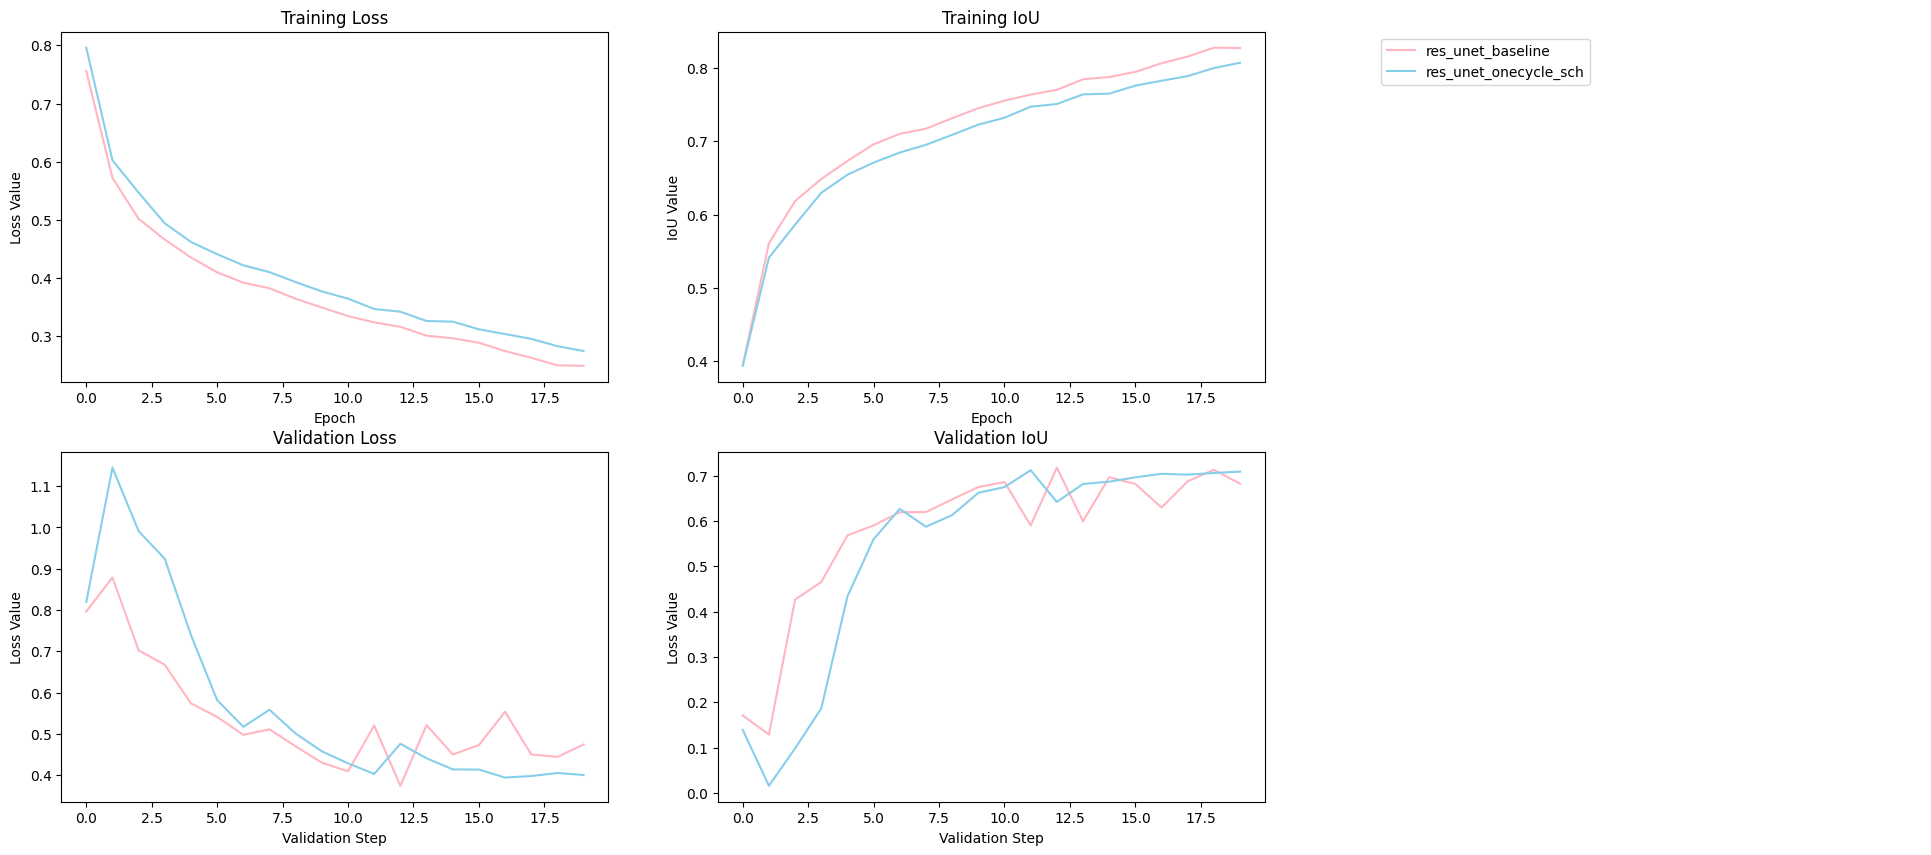

In [ ]:
show_trained_models_hist(res_trained_models)

# Egela submission
Copy this notebook to your Drive and solve the proposed exercises there.

Rename the notebook as `assignment-8-name1-surname1-name2-surname2.ipynb` (replace *name1-surname1* and *name2-surname2* with team member names and surnames).

Use the "share" button and make sure you configure such that "Anyone on the Internet with this link can view".

Copy the link provided by the "share" menu and paste it here. Only one member of the team should submit the notebook

<font color=red>**Important**</font>: Make sure the notebook is <u>fully run</u> when and the "traces" (run times) are visible when you submit.

**Submission deadline:** Sunday, February 23rd 2025, 23:59h.